In [1]:
using DifferentialEquations
using Plots
# using LaTeXStrings

┌ Info: Recompiling stale cache file /home/unkcpz/.julia/compiled/v1.1/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1184


In [2]:
function sch(du, u, p, r)
    l, E = p
    V(r) = r^2
    F(l,r,E) = V(r) + l*(l+1)/(r^2) - E
    du[1] = u[2]
    du[2] = F(l,r,E) * u[1]
end

sch (generic function with 1 method)

In [3]:
h = 0.0001
l, E = 0.0, 3.0
p = [l, E]
rspan = (h, 2.0)
u0 = [0, h^l]
prob = ODEProblem(sch, u0, rspan, p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0001, 2.0)
u0: [0.0, 1.0]

In [4]:
sol = solve(prob, saveat=h);

In [5]:
plot(sol, vars=(0,1), xaxis="r", yaxis="u(r)", label="u(r)", w=10);

In [6]:
A = exp(h^2/2)
f(r) = A * r * exp(-r^2/2)

f (generic function with 1 method)

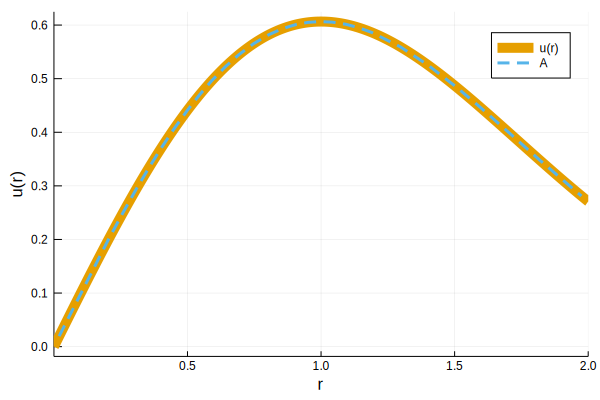

In [7]:
plot!(f, 0.0, 2, line=(:dash, 3), label="A ")